In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta
from keras.utils import to_categorical

In [3]:
n_classes = 10  # 10 classes aka numbers
n_epochs = 12  # number of epochs
batch_size = 128
n_rows, n_cols = 28, 28  # image dimensions

In [4]:
# import train and test data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

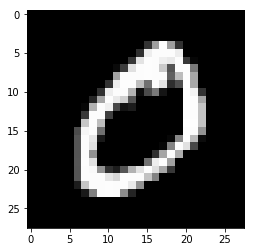

In [5]:
plt.imshow(X_train[1], cmap="gray")

In [6]:
# reshape data
X_train = X_train.reshape(X_train.shape[0], n_rows, n_cols, 1)
X_test = X_test.reshape(X_test.shape[0], n_rows, n_cols, 1)
input_shape = (n_rows, n_cols, 1)

# set datatype to float and normalize
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Onehot encoding of the classes
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [7]:
# Model creation
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation="relu",
                input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation="softmax"))

model.compile(
    loss=categorical_crossentropy,
    optimizer=Adadelta(),
    metrics=["accuracy"]
)

In [8]:
model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=n_epochs,
    verbose=2,
    validation_data=(X_test, y_test)
)


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
 - 7s - loss: 0.2730 - accuracy: 0.9155 - val_loss: 0.0592 - val_accuracy: 0.9814
Epoch 2/12
 - 3s - loss: 0.0910 - accuracy: 0.9730 - val_loss: 0.0426 - val_accuracy: 0.9852
Epoch 3/12
 - 3s - loss: 0.0663 - accuracy: 0.9807 - val_loss: 0.0340 - val_accuracy: 0.9883
Epoch 4/12
 - 3s - loss: 0.0551 - accuracy: 0.9834 - val_loss: 0.0323 - val_accuracy: 0.9895
Epoch 5/12
 - 3s - loss: 0.0471 - accuracy: 0.9857 - val_loss: 0.0300 - val_accuracy: 0.9900
Epoch 6/12
 - 3s - loss: 0.0416 - accuracy: 0.9877 - val_loss: 0.0288 - val_accuracy: 0.9906
Epoch 7/12
 - 3s - loss: 0.0379 - accuracy: 0.9886 - val_loss: 0.0299 - val_accuracy: 0.9906
Epoch 8/12
 - 3s - loss: 0.0344 - accuracy: 0.9899 - val_loss: 0.0264 - val_accuracy: 0.9908
Epoch 9/12
 - 3s - loss: 0.0322 - accuracy: 0.9903 - val_loss: 0.0269 - val_accuracy: 0.9913
Epoch 10/12
 - 3s - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.0276 - val_accuracy: 0.9912
Epoch 11/12
 - 3s 

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

In [78]:
import pickle

In [95]:
# import
with open("handwritten.pkl", "rb") as f:
    X_hw, y_hw = pickle.load(f)
    
# reshape
X_hw = X_hw.reshape(X_hw.shape[0], n_rows, n_cols, 1)

# normalize
X_hw = 1.0 - (X_hw.astype("float32") / 255.0)

# categorize
y_hw = to_categorical(y_hw, n_classes)

In [96]:
X_hw.shape, y_hw.shape

In [97]:
score = model.evaluate(X_hw, y_hw, verbose=0)
print(f"Test loss of own handwritten digits: {score[0]}")
print(f"Test accuracy: {score[1]}")

In [118]:

plt.imshow(X_train[15], cmap="gray")

In [106]:
with open("handwritten.pkl", "rb") as f:
    X_hw, y_hw = pickle.load(f)
X_hw = 1 - X_hw
plt.imshow(X_hw[0], cmap="gray")